# Erdos Renyi random graph with Python - some examples

### Import needed Packages

In [1]:
import numpy as np
import math
import networkx as net
import matplotlib.pyplot as plt
from pyvis.network import Network as netviz

### Set parameters for the random Graph

In [2]:
N = 100
p = 0.05

### Generate random Graph as `G`

In [3]:
G = net.gnp_random_graph(N,p)

### Check if the Graph is connected and if not choose the largest connected component as `G0`

In [4]:
conn = net.is_connected(G)

if conn:
    print("the graph is connected")
    G0 = G
else:
    GCC = sorted(net.connected_components(G), key=len, reverse=True)
    G0 = G.subgraph(GCC[0])
    print("the graph is not connected")

n = len(G0)
print("number of vertices in G0 is %d" %n)

the graph is connected
number of vertices in G0 is 100


### collect the degrees of `G0` in a list

In [5]:
deg = []   # initialize an empty list
for v in G0.nodes():
    deg.append(net.degree(G0,v))
print(deg)

[8, 7, 6, 7, 3, 6, 4, 11, 8, 3, 7, 4, 2, 9, 4, 7, 7, 3, 6, 7, 7, 5, 9, 2, 6, 6, 5, 5, 4, 2, 5, 3, 5, 4, 9, 7, 5, 5, 7, 9, 6, 8, 5, 6, 6, 4, 8, 5, 4, 7, 5, 8, 5, 4, 4, 6, 6, 5, 5, 3, 6, 5, 3, 5, 10, 3, 6, 6, 5, 7, 4, 7, 6, 9, 5, 3, 3, 2, 5, 8, 4, 2, 9, 3, 4, 6, 5, 6, 4, 1, 5, 7, 1, 4, 9, 9, 7, 9, 5, 5]


### Add a property `size` to each vertex depending on the degree of the vertex

In [6]:
for v in G0.nodes():
    G0.nodes[v]["size"] = math.sqrt(deg[v])*10

### Plot a Histogram of the degrees in `G0`

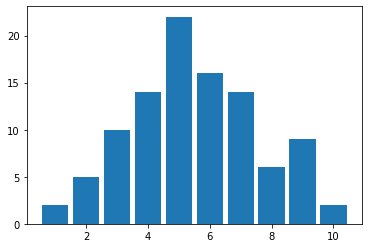

In [7]:
num, bins, obj = plt.hist(deg, bins=max(deg)-min(deg), align="left", rwidth=0.85)

### Visualize graph

In [8]:
viz = netviz(height=800, width=800, notebook=True)
viz.barnes_hut()
viz.from_nx(G0)
viz.show("net.html")